In [54]:
# need to install pandas and matplotlib first

In [55]:
import pandas as pd
import matplotlib.pyplot as plt



In [56]:
df = pd.read_csv("d.csv")
print(df.head(10))

               Date          Chat Name  Creator        Exchanges      Symbol  \
0  01/03/2021 13:59  #Delta 15 staging      NaN  Binance Futures    AXS/USDT   
1  01/03/2021 13:59  #Delta 15 staging      NaN  Binance Futures   YFII/USDT   
2  01/03/2021 13:59  #Delta 15 staging      NaN  Binance Futures  ALPHA/USDT   
3  01/03/2021 13:59  #Delta 15 staging      NaN  Binance Futures    TRB/USDT   
4  01/03/2021 13:20  #Delta 15 staging      NaN  Binance Futures   AVAX/USDT   
5  01/03/2021 13:16  #Delta 15 staging      NaN  Binance Futures   AAVE/USDT   
6  01/03/2021 13:15  #Delta 15 staging      NaN  Binance Futures   RUNE/USDT   
7  01/03/2021 13:15  #Delta 15 staging      NaN  Binance Futures    UNI/USDT   
8  01/03/2021 13:07  #Delta 15 staging      NaN  Binance Futures   COMP/USDT   
9  01/03/2021 13:03  #Delta 15 staging      NaN  Binance Futures    BLZ/USDT   

      Status         Leverage Direction  Last Target  Signal Gained Profit %  
0  Cancelled  Isolated (5.0X)     Short 

In [57]:
"""Data Cleaning: Remove Creator, DO NOT REMOVE Cancelled"""
refined_df = df.drop(columns="Creator")
print(refined_df.head())

               Date          Chat Name        Exchanges      Symbol  \
0  01/03/2021 13:59  #Delta 15 staging  Binance Futures    AXS/USDT   
1  01/03/2021 13:59  #Delta 15 staging  Binance Futures   YFII/USDT   
2  01/03/2021 13:59  #Delta 15 staging  Binance Futures  ALPHA/USDT   
3  01/03/2021 13:59  #Delta 15 staging  Binance Futures    TRB/USDT   
4  01/03/2021 13:20  #Delta 15 staging  Binance Futures   AVAX/USDT   

      Status         Leverage Direction  Last Target  Signal Gained Profit %  
0  Cancelled  Isolated (5.0X)     Short            0                  0.0000  
1  Cancelled  Isolated (5.0X)     Short            0                  0.0000  
2  Cancelled  Isolated (5.0X)     Short            0                  0.0000  
3  Cancelled  Isolated (5.0X)     Short            0                  0.0000  
4  Cancelled  Isolated (5.0X)      Long            0                -12.9595  


In [58]:
"""Split Dataframe by coin, research more whether is there a more panda-esque method"""
unique_coin_list = refined_df["Symbol"].unique()
print(unique_coin_list)

list_of_coin_df = []

# appends to list_of_coin_df a subset Dataframe of the main Dataframe where the "Symbol" matches the coin
for coin in unique_coin_list:
    list_of_coin_df.append(refined_df[refined_df["Symbol"] == coin])
""" print(list_of_coin_df) """

['AXS/USDT' 'YFII/USDT' 'ALPHA/USDT' 'TRB/USDT' 'AVAX/USDT' 'AAVE/USDT'
 'RUNE/USDT' 'UNI/USDT' 'COMP/USDT' 'BLZ/USDT' 'YFI/USDT' 'CVC/USDT'
 'RLC/USDT' 'NEAR/USDT' 'REN/USDT' 'FLM/USDT' 'CRV/USDT' 'SNX/USDT'
 'LRC/USDT' 'BAL/USDT' 'BEL/USDT' 'SRM/USDT' 'SOL/USDT' 'BAND/USDT'
 'DOGE/USDT' 'HNT/USDT' 'BZRX/USDT' 'SUSHI/USDT' 'STORJ/USDT' 'ENJ/USDT'
 'CTK/USDT' 'FIL/USDT' 'MKR/USDT']


' print(list_of_coin_df) '

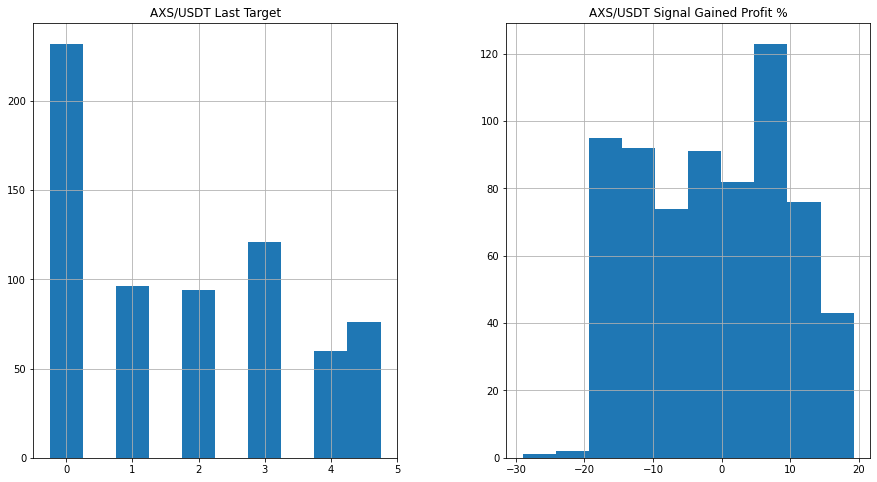

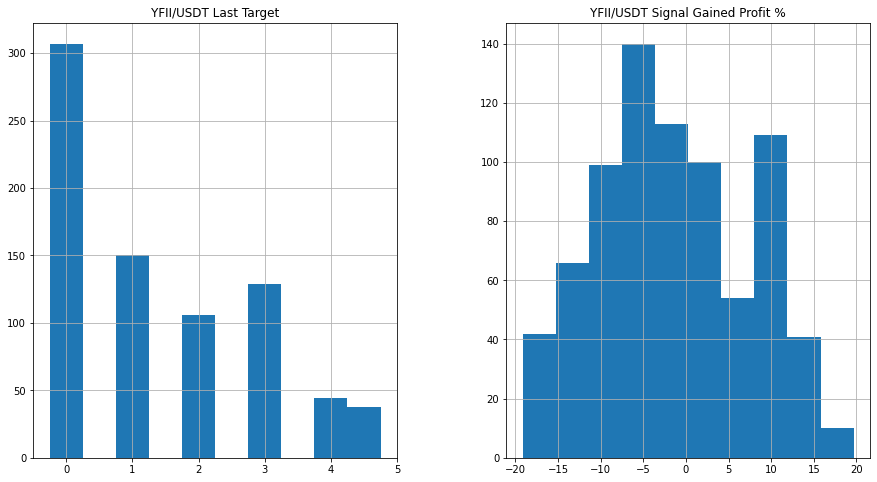

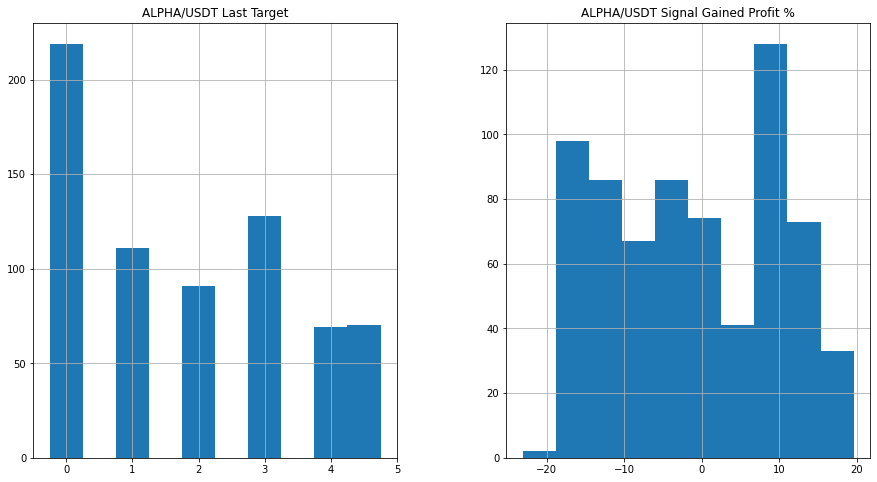

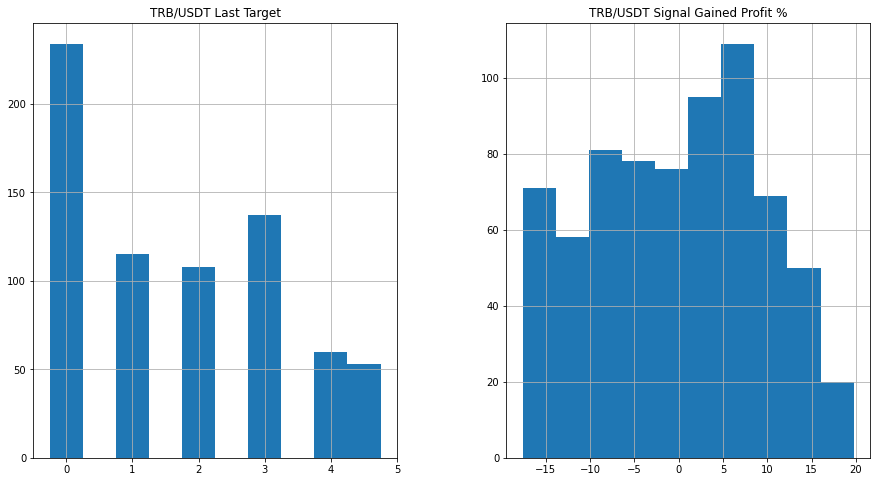

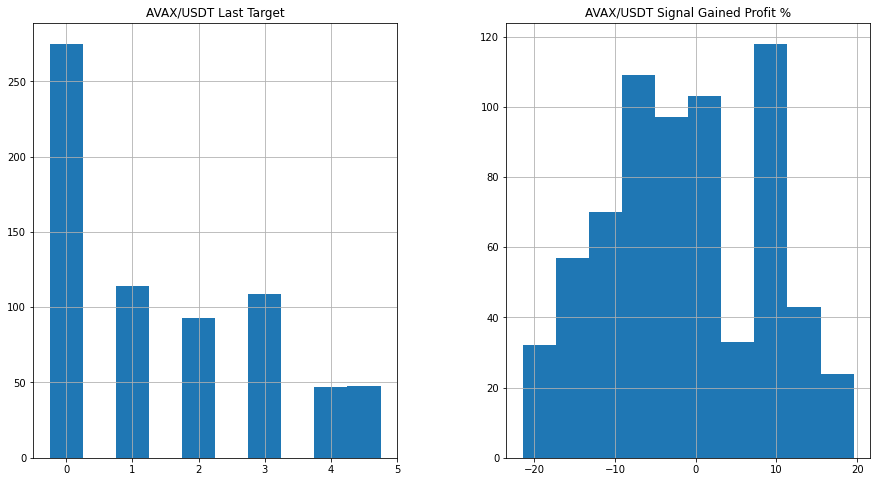

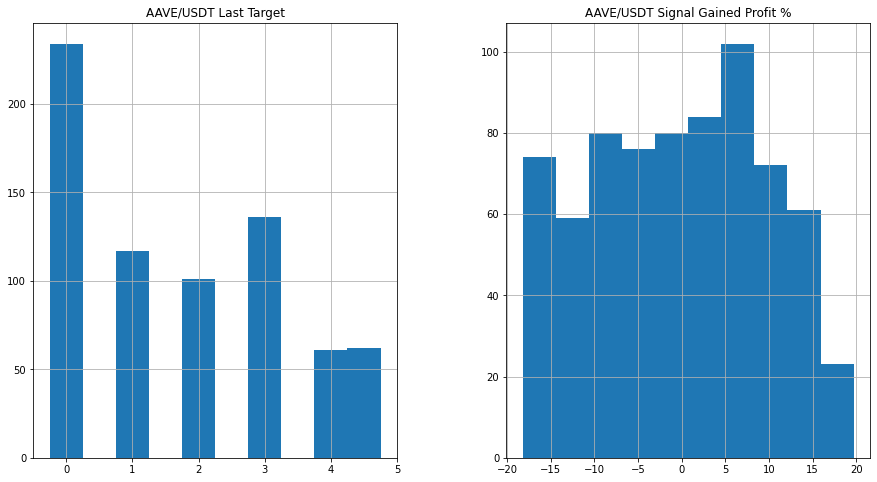

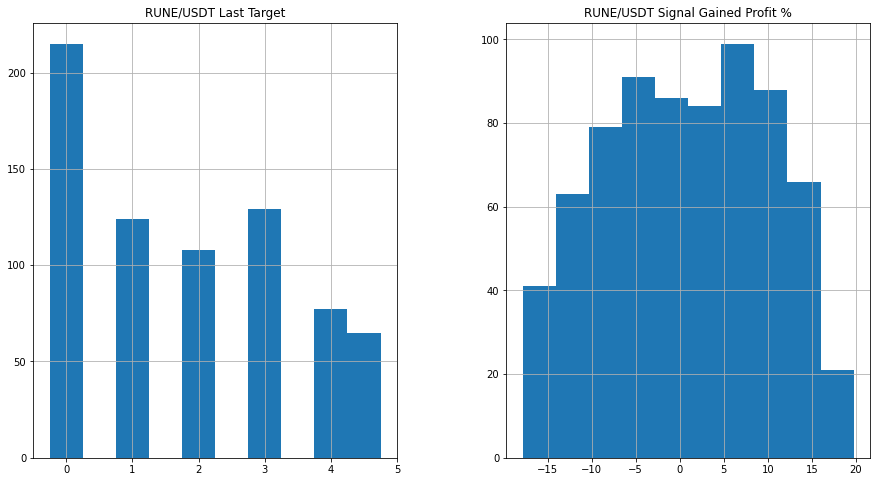

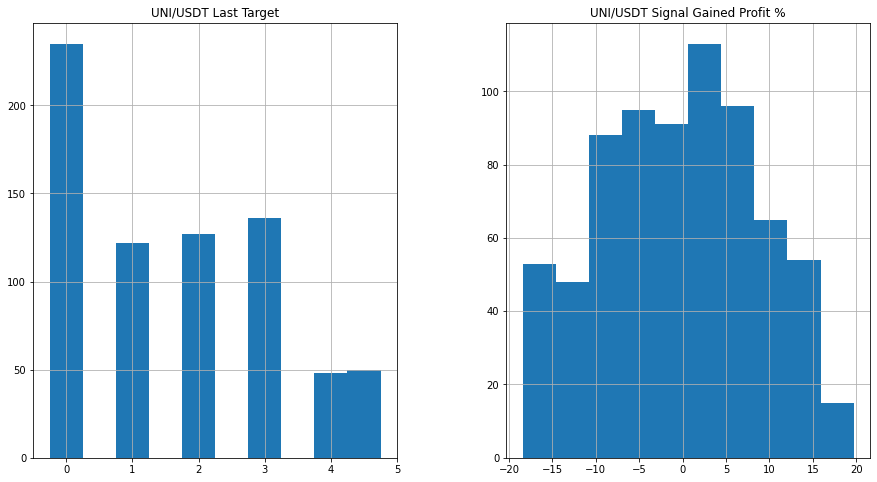

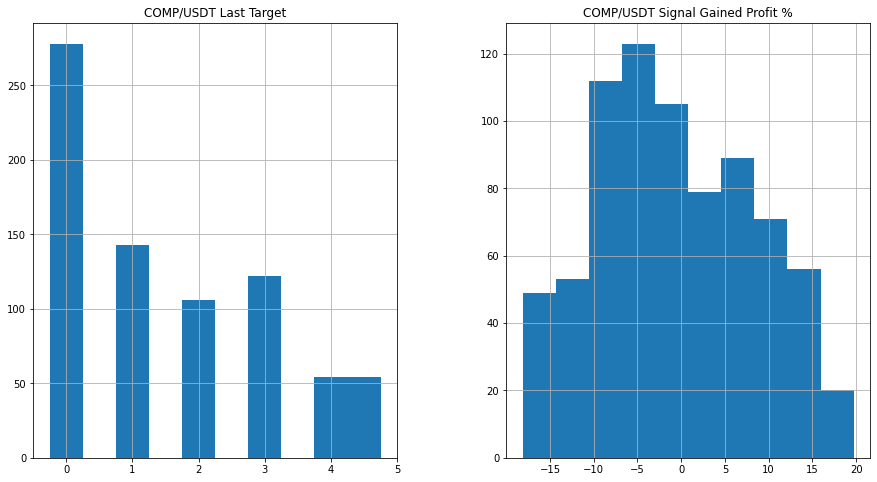

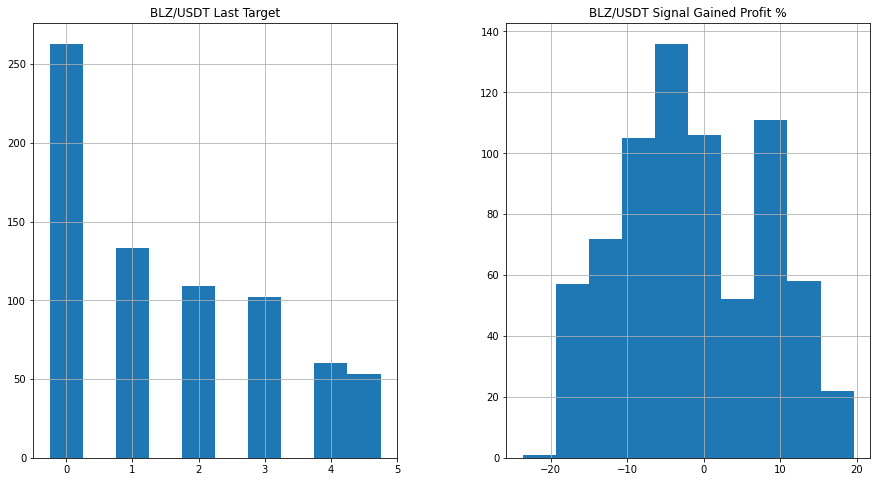

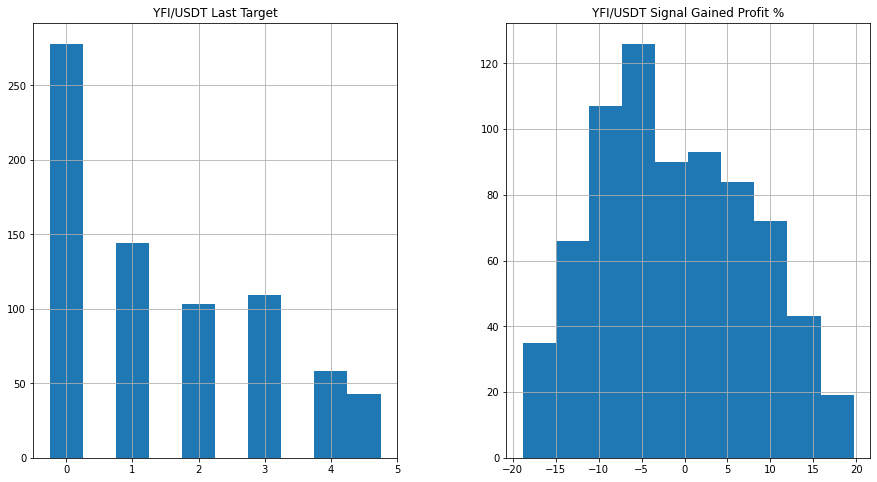

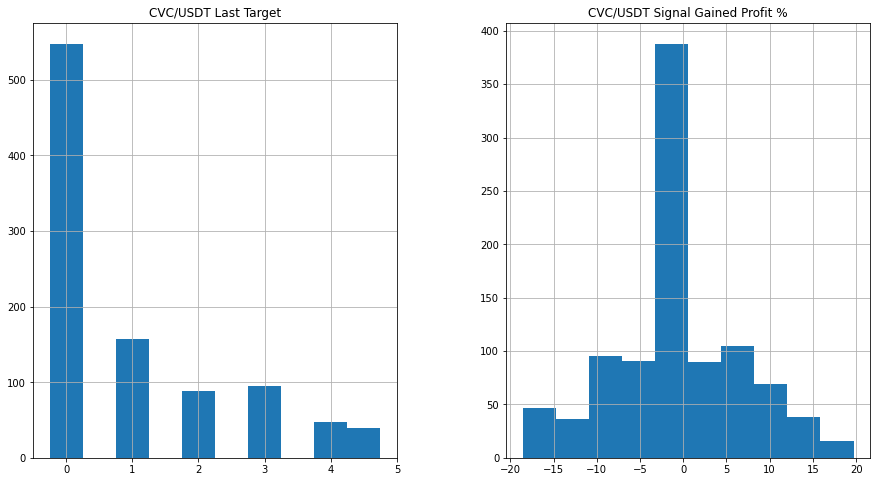

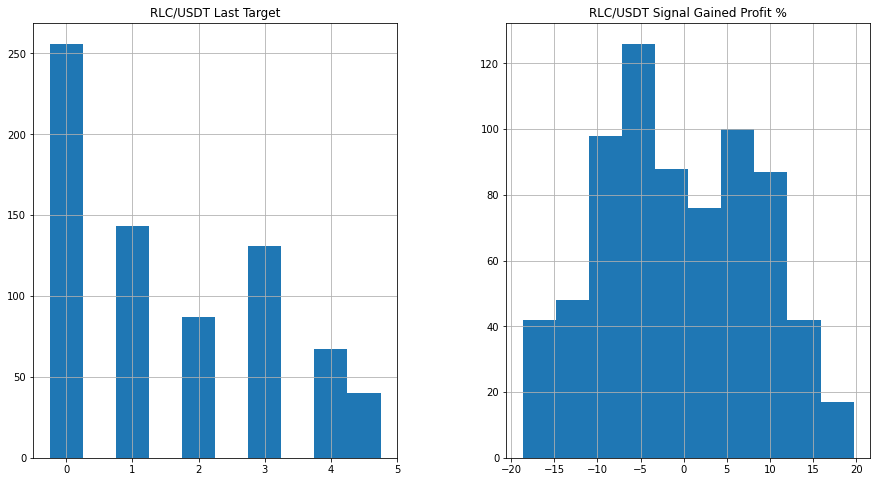

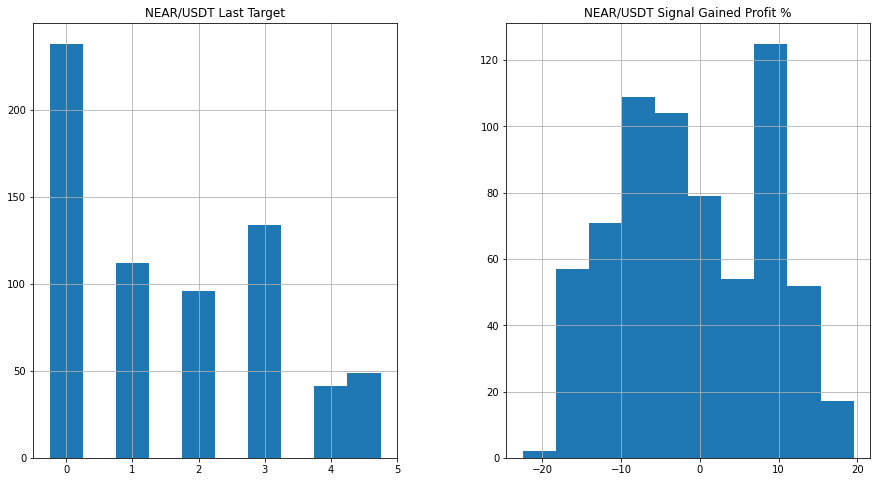

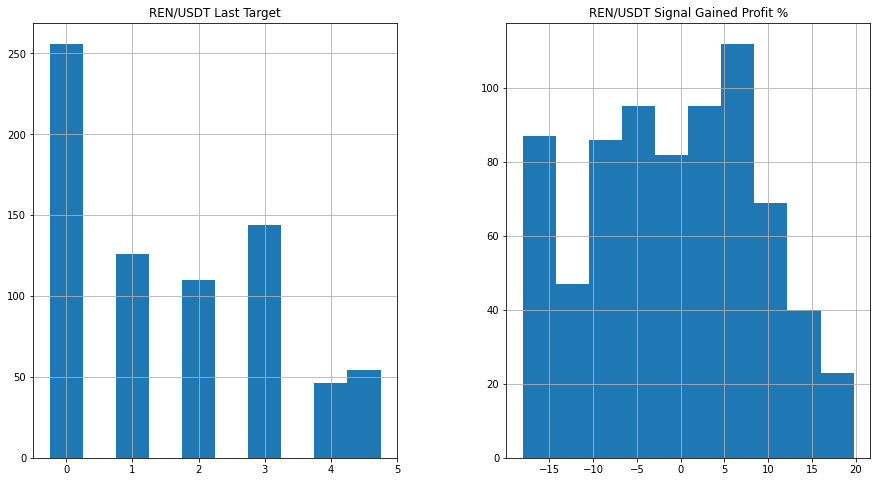

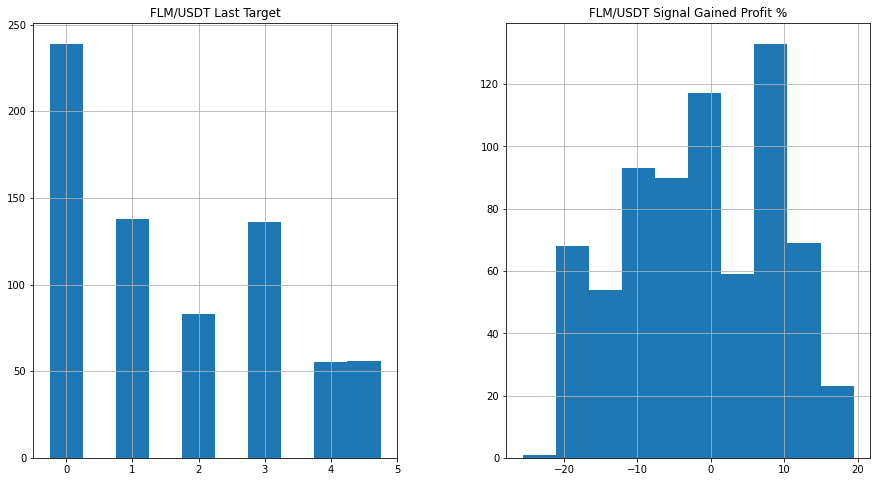

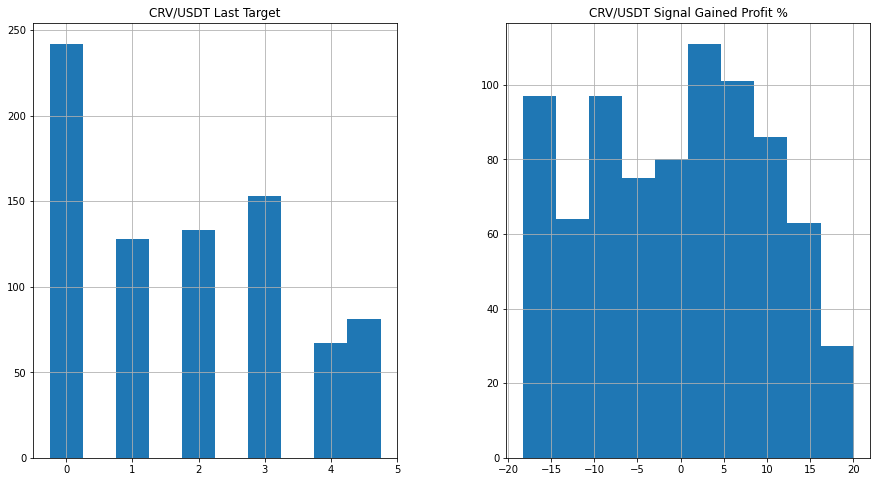

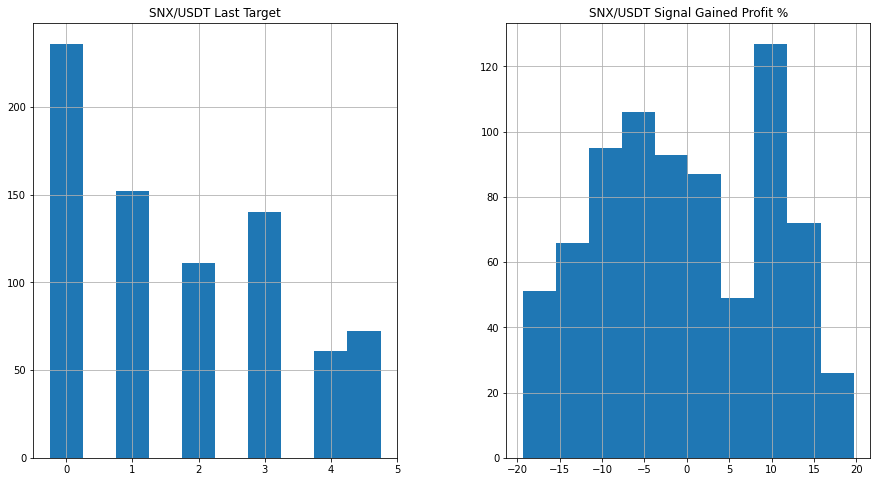

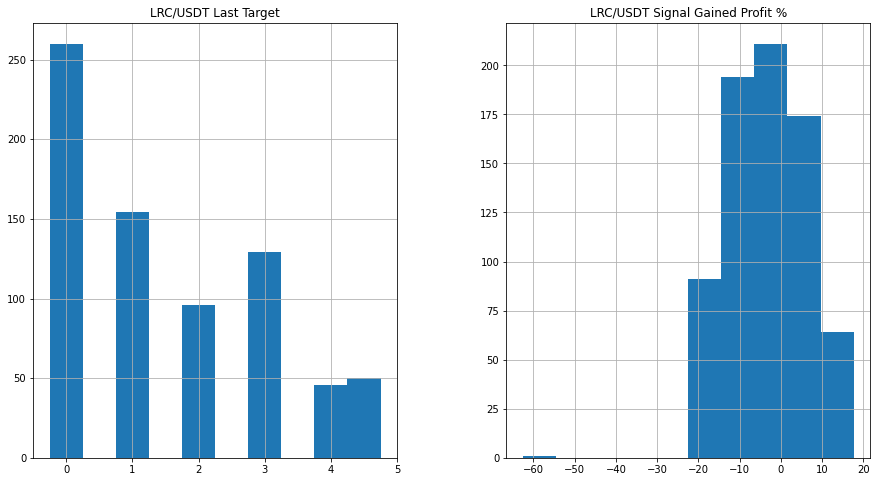

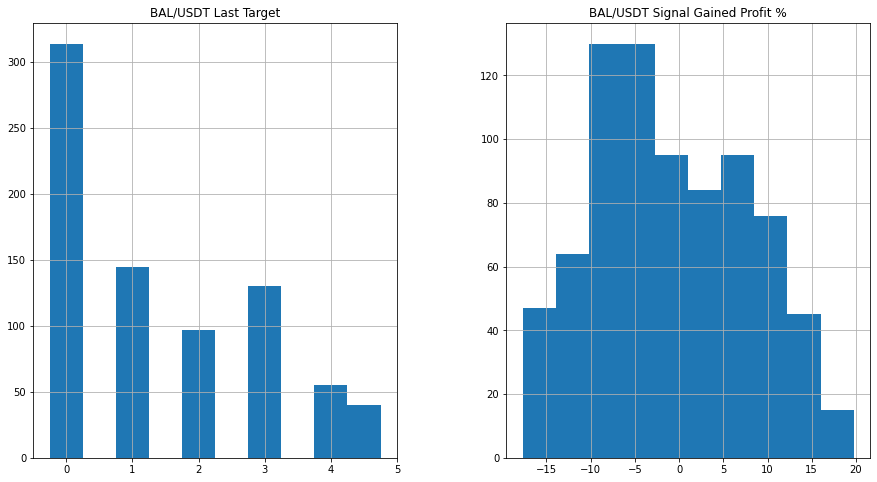

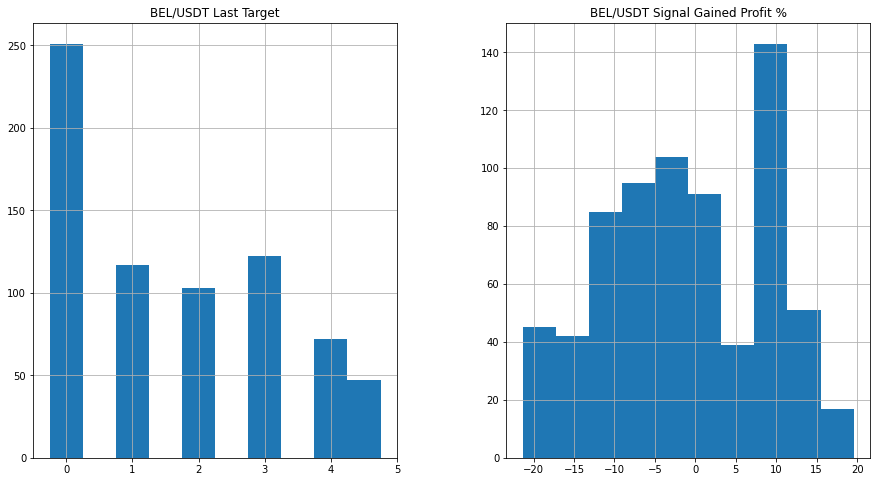

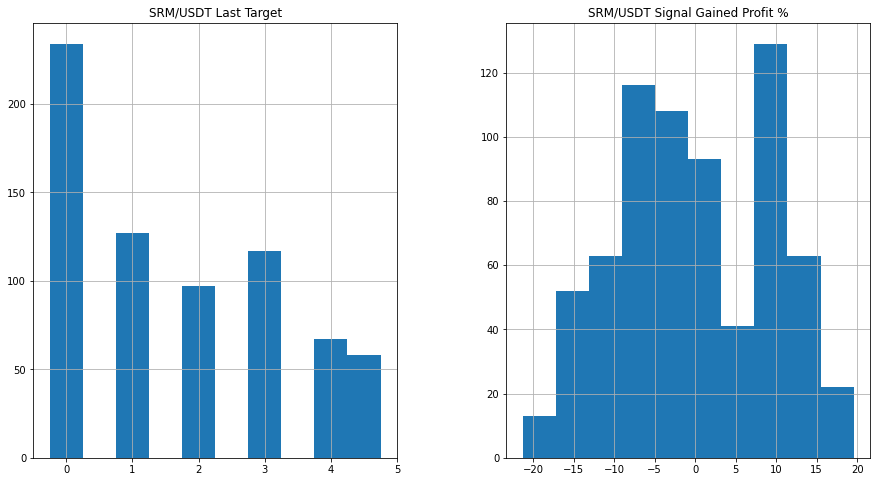

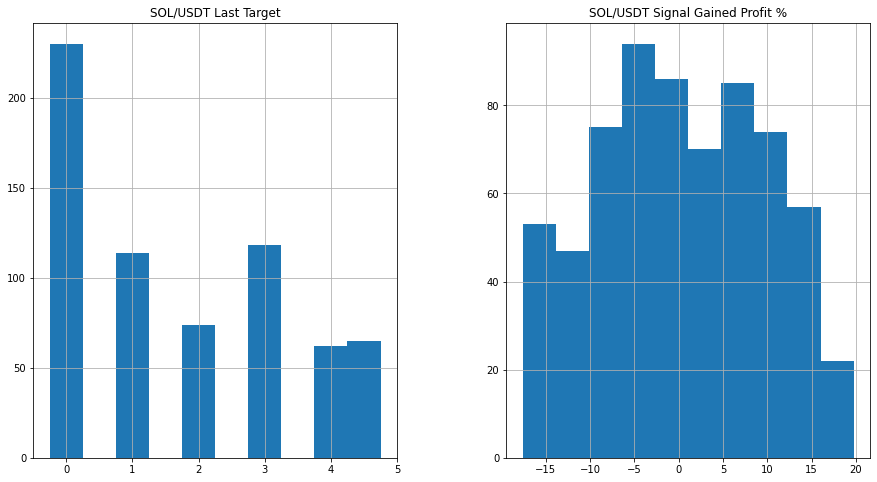

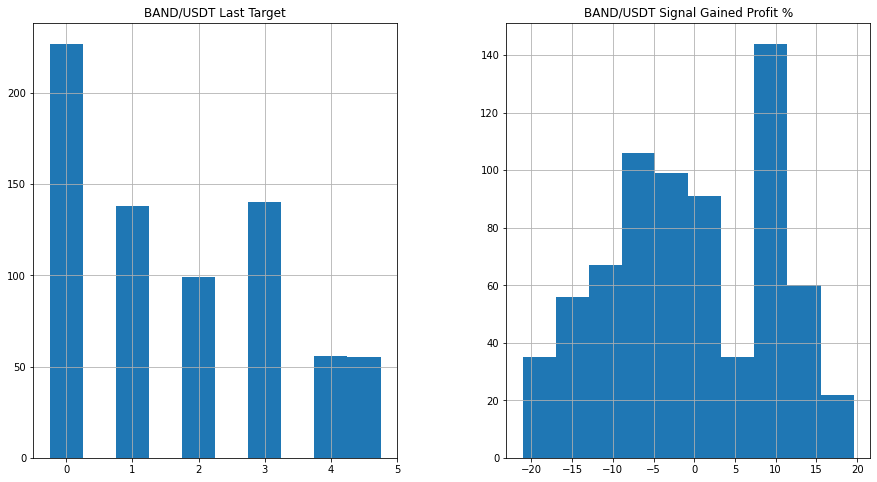

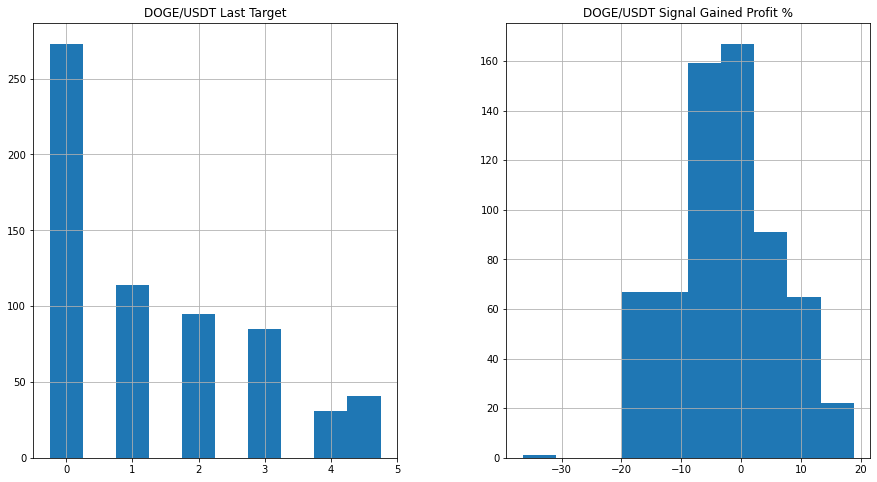

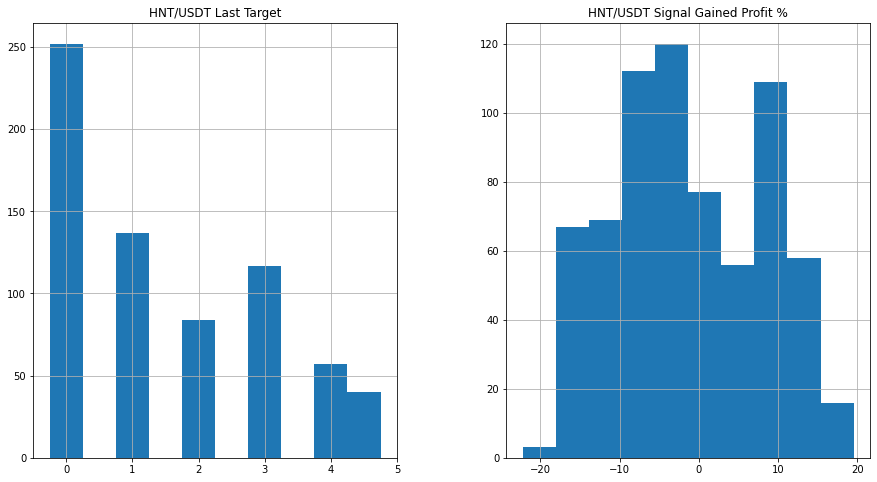

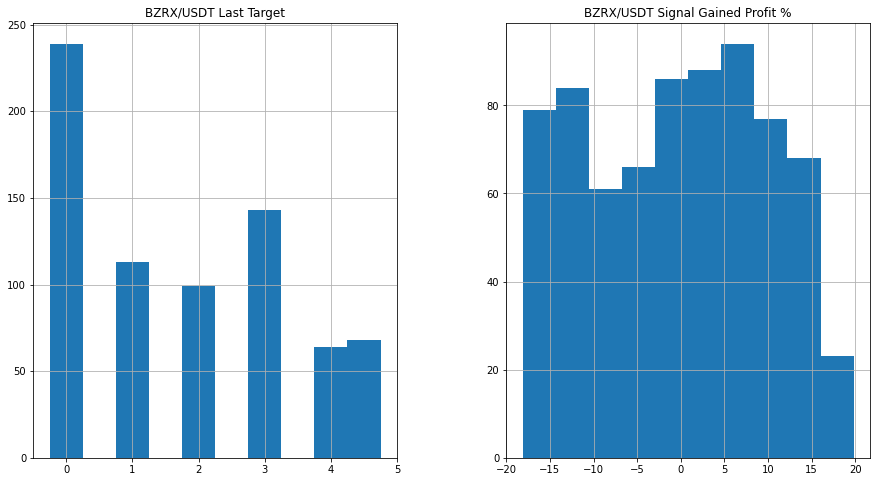

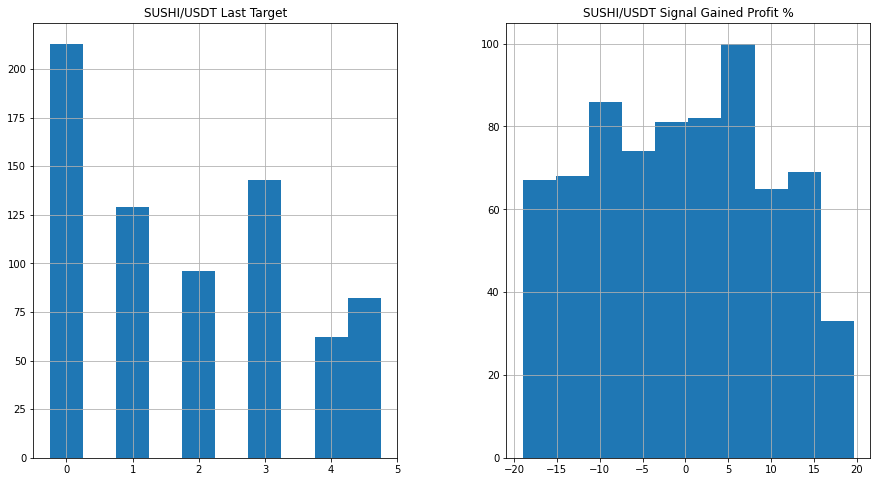

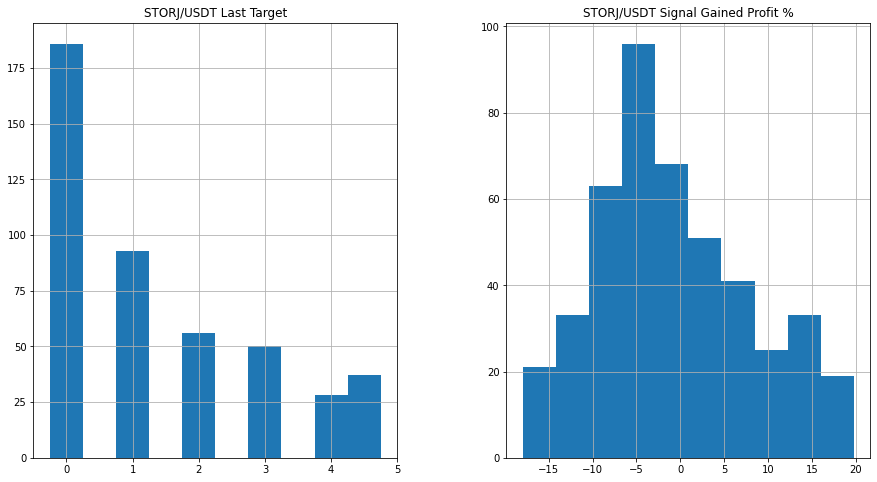

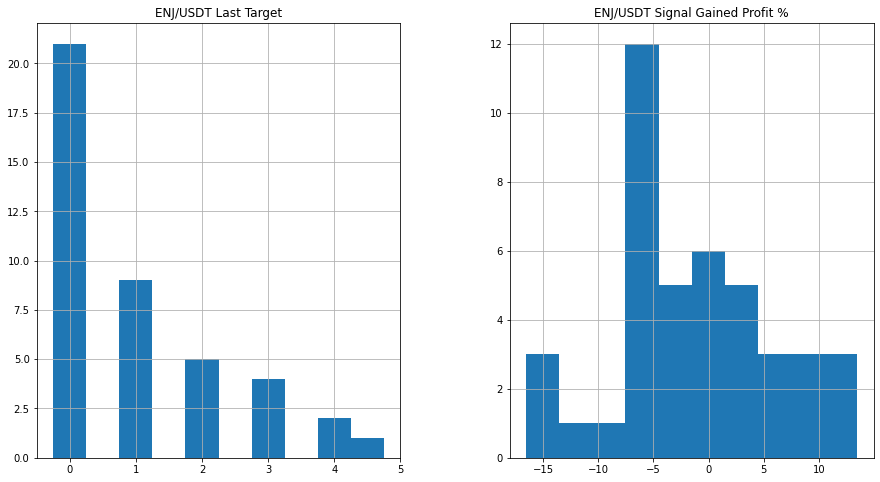

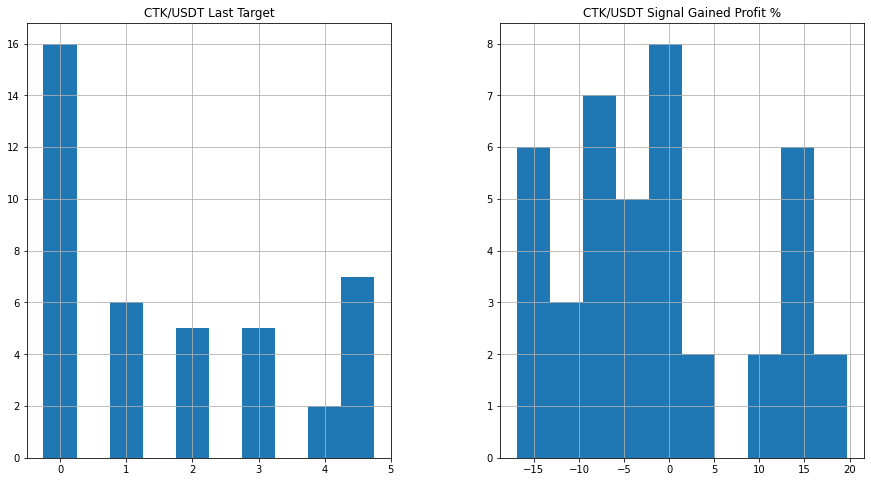

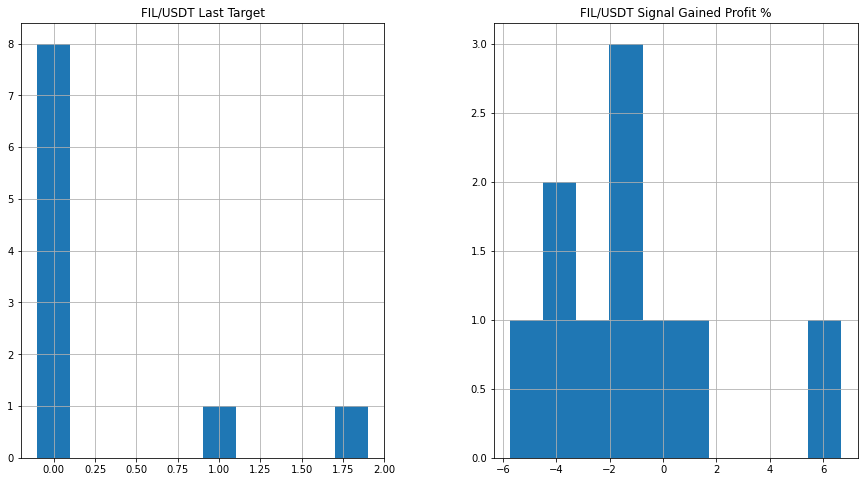

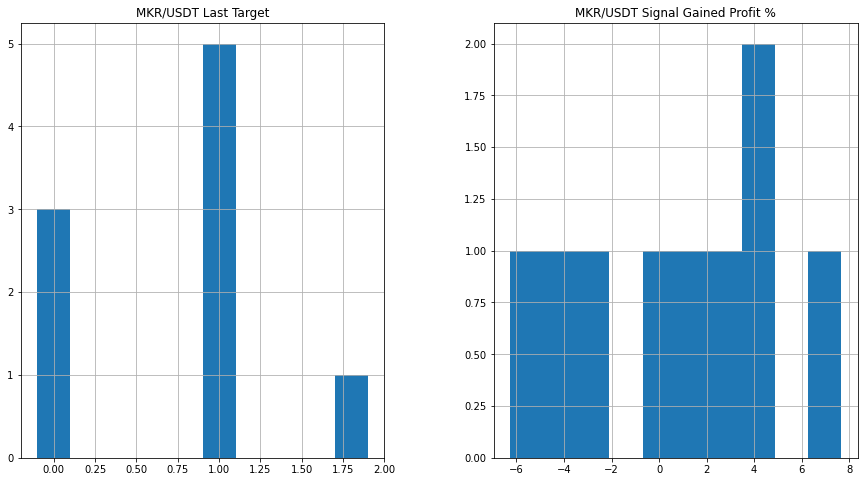

In [59]:
""" Plot out the coins, but having issues with the range of the axes"""
# helper function to loop through the list of coin dataframes and plot each graph as a subplot
%matplotlib inline

def coin_subplot(list_unique_coins=unique_coin_list, list_to_loop=list_of_coin_df):
    # enumerate returns the index of the element, and the element of the iterable it is iterating through 
    # note that All but the last (righthand-most) bin is half-open. See documentation for more details.
    # above is the reason that the last value on the right seems to stick to the second last value, i.e. 4 and 5 shud be separated but they are side by side for Last Target
    for index, element in enumerate(list_to_loop):
        coin_df = element
        ax = coin_df.hist(
            align="left", 
            figsize=(15, 8)
            )
        # print(ax) gives [[<AxesSubplot:title={'center':'Last Target'}> <AxesSubplot:title={'center':'Signal Gained Profit %'}>]]
        # print(type(ax)) gives <class 'numpy.ndarray'>
        # hence need to iterate through the np array, or select the sub element
        # need to brush up on np array stuff...
        ax[0][0].set_title("{0} Last Target".format(list_unique_coins[index]))
        ax[0][1].set_title("{0} Signal Gained Profit %".format(list_unique_coins[index]))
        
      

coin_subplot() 


array([[<AxesSubplot:title={'center':'Last Target'}>,
        <AxesSubplot:title={'center':'Signal Gained Profit %'}>]],
      dtype=object)

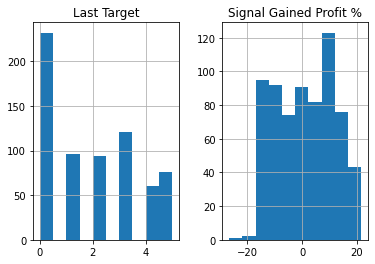

In [60]:
df_test = list_of_coin_df[0]
df_test.hist()
